In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')

In [3]:
X = data[:,[0,1]]
y = data[:,2]
y = y[:,np.newaxis]

In [4]:
# Part 1: Plotting

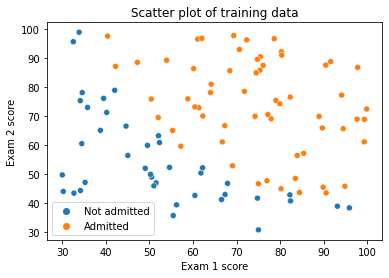

In [5]:
y_enums = np.where(y == 1, 'Admitted', 'Not admitted')
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_enums[:,0])
_ = ax.set(title='Scatter plot of training data', xlabel='Exam 1 score', ylabel='Exam 2 score')

In [6]:
# Part 2: Compute Cost and Gradient

In [7]:
m, n = X.shape

In [8]:
X = np.hstack((np.ones((m, 1)), X))  # X with intercept term
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def compute_cost(theta, X, y):
    m = X.shape[0]
    predictions = X.dot(theta)
    g = sigmoid(predictions)
    cost_term = np.dot(-y.T, np.log(g)) - np.dot((1-y).T, np.log(1-g))
    return (1 / m) * np.sum(cost_term)

In [11]:
def compute_gradient(theta, X, y):
    theta = theta.reshape((theta.shape[0], 1))  # fmin_bfgs passes x0 (initial thetha) with (x,) shape
    predictions = X.dot(theta)
    g = sigmoid(predictions)
    gradient = (1 / m) * X.T.dot(g - y)
    n = X.shape[1]
    return gradient.reshape((n,))  # fmin_bfgs expects (n,) shape

In [12]:
initial_theta = np.zeros((n+1, 1))
compute_cost(initial_theta, X, y)

0.6931471805599453

In [13]:
compute_gradient(initial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [14]:
test_theta = np.array([[-24], [0.2], [0.2]])
compute_cost(test_theta, X, y)

0.2183301938265977

In [15]:
compute_gradient(test_theta, X, y)

array([0.04290299, 2.56623412, 2.64679737])

In [16]:
# Part 3: Optimizing using fmin_bfgs

In [17]:
from scipy.optimize import fmin_bfgs


final_theta, fopt, iter, funcalls, warnflag, allvecs, _ = \
    fmin_bfgs(f=compute_cost, x0=initial_theta, fprime=compute_gradient, args=(X, y), maxiter=100, full_output=True)
print('Cost:', fopt)
print('Final theta:', final_theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Cost: 0.20349770158944375
Final theta: [-25.16133284   0.2062317    0.2014716 ]


/tmp/ipykernel_242/2552154057.py:5: RuntimeWarning: divide by zero encountered in log
  cost_term = np.dot(-y.T, np.log(g)) - np.dot((1-y).T, np.log(1-g))


In [18]:
def plot_decision_boundary(theta, X):
    plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    y_enums = np.where(y == 1, 'Admitted', 'Not admitted')
    ax = sns.scatterplot(x=X[:,1], y=X[:,2], hue=y_enums[:,0])
    ax.set(title='Scatter plot of training data', xlabel='Exam 1 score', ylabel='Exam 2 score')
    sns.lineplot(x=plot_x, y=plot_y, ax=ax)

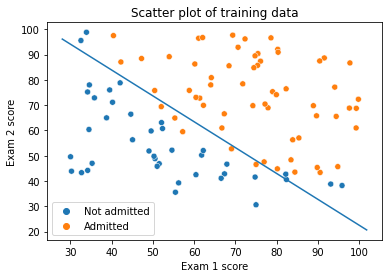

In [19]:
plot_decision_boundary(final_theta, X)

In [20]:
# Part 4: Predict and Accuracies

In [21]:
student_score = np.array([1, 45, 85])
print('For a student with scores 45 and 85, we predict an admission'
      'probability of:', sigmoid(student_score.dot(final_theta)))

For a student with scores 45 and 85, we predict an admissionprobability of: 0.7762907240588947


In [22]:
def predict(theta, X):
    g = sigmoid(X.dot(theta))
    return np.where(g >= 0.5, 1, 0)

In [23]:
p = predict(final_theta, X)
print('Train accuracy:', np.mean(p.reshape(p.shape[0], 1) == y))

Train accuracy: 0.89
